# BANK TELE MARKETING PREDICTION 

A Bank wants to cross-sell a new term deposit product to its existing cutomers. 
So, the bank wants to predict who among the existing customers will accept the new product. 
Then the bank plans to do tele marketing to only those potential customers.
By doing this, the bank can reduce marketing cost and have higher conversion rate for the new product.

In [1]:
pwd

'C:\\Users\\Ranjith P\\Desktop\\Bank Tele Marketing'

In [2]:
#Bank Telemarketing Dataset. 

In [2]:
#Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Importing Dataset:

In [3]:
#Importing dataset:(bd=bank data)

bd=pd.read_csv("bank-additional-full.csv",sep=";")

# ATTRIBUTE INFORMATION:

Input variables:

Bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:


12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


Link:   
https://archive.ics.uci.edu/ml/datasets/bank+marketing#

...

In [4]:
################################################################################################################################

# Task 2: Exploratory Data Analysis:

In [5]:
bd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bd.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
#Dimension:
bd.shape

(41188, 21)

In [9]:
bd.dtypes #Thus all the variables are in proper data type.

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
#Summary of all variables together:
bd.describe(include="all")  #NaN means we can't find that value. We can't find mean for categorical data.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


# Proportion of Target Class:

no     36548
yes     4640
Name: y, dtype: int64


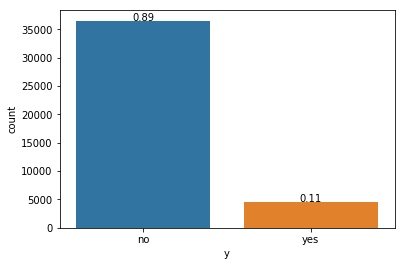

In [11]:
#Checking target class proportion:
bd["y"].value_counts()

#Looking at the proportion of target class:
print(bd.y.value_counts())
churn_proportion=sns.countplot(x="y", data=bd)

total = float(len(bd))
for p in churn_proportion.patches:
    height = p.get_height()
    churn_proportion.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

In [12]:
################################################################################################################################

# Task 3: Data Pre-Processing
#TASK 3.1: Missing value Analysis
#TASK 3.2: Outlier Treatment on numerical variables
#TASK 3.3: Correlation analysis on numerical variables(Feature selection)
#TASK 3.4: Categorical data treatment
#TASK 3.5: Chi-Square analysis of categorical variables(Feature selection)
#TASK 3.6: Creating dummy variables for categorical variables:

# Task 3.1: Missing Value Analysis:

In [13]:
#Missing value treatment:
#Creating data frame with missing %
mv=pd.DataFrame(bd.isnull().sum())
mv 

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


There is no missing values in this bd dataset. 

In [14]:
#Making a copy of data before outlier treatment:
bd1=bd.copy()

# Task 3.2 Outlier Analysis & Imputation:

In [15]:
#Treating Numerical variables:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

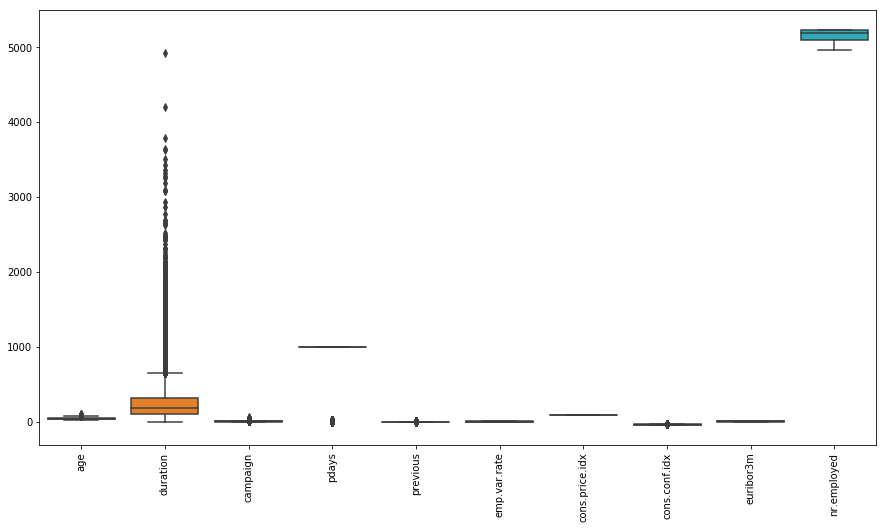

In [16]:
#Outlier analysis:
#Box-plot visualisation:
#bd.plot(kind='box', figsize=[10,10])

plt.figure(figsize=(15,8))
ax = sns.boxplot( data=bd)
plt.xticks(rotation=90)

In [17]:
#Saving names of numerical variables:
cnames=["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

In [18]:
#Detect Outliers:
for i in cnames:
    print(i)
    q75,q25=np.percentile(bd.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    print(min)
    print(max)

age
9.5
69.5
duration
-223.5
644.5
campaign
-2.0
6.0
pdays
999.0
999.0
previous
0.0
0.0
emp.var.rate
-6.6000000000000005
6.200000000000001
cons.price.idx
91.69650000000001
95.3725
cons.conf.idx
-52.150000000000006
-26.949999999999992
euribor3m
-4.081499999999999
10.3865
nr.employed
4905.6
5421.6


In [19]:
bd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


{'whiskers': [<matplotlib.lines.Line2D at 0x1ad1a4e1eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad1a4e8860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad1a4e1d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad1a4e8ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad1a4e8fd0>],
 'means': []}

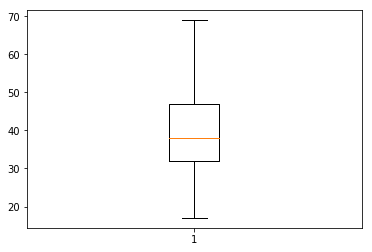

In [20]:
#Imputing outliers in age variable using median:
bd.loc[bd["age"]<9,:"age"]=bd["age"].median()
bd.loc[bd["age"]>69,:"age"]=bd["age"].median()
plt.boxplot(bd["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad1a68c630>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad1a68ccc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad1a68c208>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad1a697390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad1a6976d8>],
 'means': []}

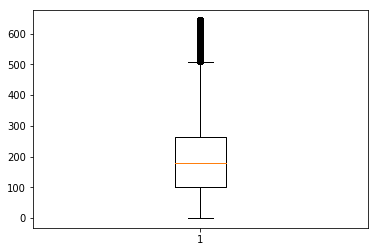

In [21]:
##Imputing outliers in duration variable using median:
bd.loc[bd["duration"]< -223.5,:"duration"]=bd["duration"].median()
bd.loc[bd["duration"]> 644.5,:"duration"]=bd["duration"].median()
plt.boxplot(bd["duration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad1a551d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad1a55d710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad1a551c18>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad1a55dda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad1a55de80>],
 'means': []}

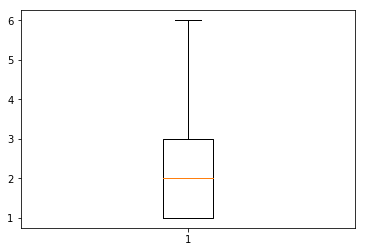

In [22]:
#Imputing outliers in campaign variable using median:
bd.loc[bd["campaign"]< -2.0,:"campaign"]=bd["campaign"].median()
bd.loc[bd["campaign"]> 6.0,:"campaign"]=bd["campaign"].median()
plt.boxplot(bd["campaign"])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

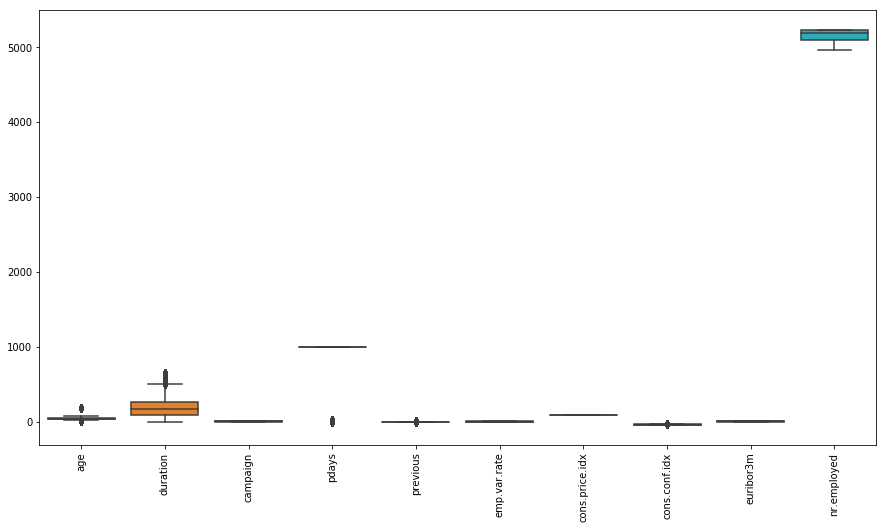

In [23]:
#Box-plot visualisation after outlier treatment:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=bd)
plt.xticks(rotation=90)

Thus, outliers are reduced. It's now alright.

In [24]:
#creating seperate dataframe with numerical variables:
bdnumerics=bd.loc[:,cnames]

# Transforming Target Vraiable:

In [25]:
#Making the target variable in to factor
bd["y"]=bd["y"].map(dict(yes=1, no=0))

In [26]:
bd["y"]=bd["y"].astype(object)

In [27]:
bd["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

# Task 3.3: Feature Selection

In [28]:
#Correlation among numerical independent variables:
correlation=bd.corr()
correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.055475,0.015504,-0.025806,0.011182,-0.017958,-0.010465,0.006072,-0.015010,-0.021689
duration,0.055475,1.000000,-0.049694,-0.080053,0.063961,-0.087168,-0.031314,0.004021,-0.091472,-0.110489
campaign,0.015504,-0.049694,1.000000,0.044984,-0.058264,0.097183,0.073688,-0.021339,0.081501,0.092293
pdays,-0.025806,-0.080053,0.044984,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.011182,0.063961,-0.058264,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.017958,-0.087168,0.097183,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,-0.010465,-0.031314,0.073688,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.006072,0.004021,-0.021339,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,-0.015010,-0.091472,0.081501,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.021689,-0.110489,0.092293,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [29]:
#Plotting Correlation Plot:
#import seaborn as sns

correlation.style.background_gradient(cmap='BuGn')

#f,ax=plt.subplots(figsize=(7,5))
#sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),
#                   cmap=sns.diverging_palette(220,10,as_cmap=True),
#                   square=True,ax=ax)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,0.0554747,0.0155045,-0.0258063,0.0111816,-0.017958,-0.0104645,0.0060724,-0.0150096,-0.0216894
duration,0.0554747,1,-0.0496936,-0.0800527,0.0639615,-0.0871678,-0.0313139,0.00402075,-0.091472,-0.110489
campaign,0.0155045,-0.0496936,1,0.0449845,-0.058264,0.0971832,0.0736882,-0.0213391,0.0815011,0.0922929
pdays,-0.0258063,-0.0800527,0.0449845,1,-0.587514,0.271004,0.0788891,-0.0913424,0.296899,0.372605
previous,0.0111816,0.0639615,-0.058264,-0.587514,1,-0.420489,-0.20313,-0.0509364,-0.454494,-0.501333
emp.var.rate,-0.017958,-0.0871678,0.0971832,0.271004,-0.420489,1,0.775334,0.196041,0.972245,0.90697
cons.price.idx,-0.0104645,-0.0313139,0.0736882,0.0788891,-0.20313,0.775334,1,0.0589862,0.68823,0.522034
cons.conf.idx,0.0060724,0.00402075,-0.0213391,-0.0913424,-0.0509364,0.196041,0.0589862,1,0.277686,0.100513
euribor3m,-0.0150096,-0.091472,0.0815011,0.296899,-0.454494,0.972245,0.68823,0.277686,1,0.945154
nr.employed,-0.0216894,-0.110489,0.0922929,0.372605,-0.501333,0.90697,0.522034,0.100513,0.945154,1


From correlation it's found that  (Multicollinearity exists)

#emp.var.rate & euribor3m &  has correlation of 0.97 (high +ve correlation)
#emp.var.rate & nr.employed has correlation of 0.90 (high +ve correlation)
#euribor3m    & nr.employed has correlation of 0.94 (high +ve correlation)

In [30]:
#Deleting emp.var.rate variable due to mc issue.
del bd["emp.var.rate"]

In [31]:
bd.columns #Thus deleted the emp.var.rate variable due to mc issue.

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [32]:
#Again checking correlation among numerical independent variables (after deleting emp.var.rate variable) :
correlation=bd.corr()
correlation

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.055475,0.015504,-0.025806,0.011182,-0.010465,0.006072,-0.015010,-0.021689
duration,0.055475,1.000000,-0.049694,-0.080053,0.063961,-0.031314,0.004021,-0.091472,-0.110489
campaign,0.015504,-0.049694,1.000000,0.044984,-0.058264,0.073688,-0.021339,0.081501,0.092293
pdays,-0.025806,-0.080053,0.044984,1.000000,-0.587514,0.078889,-0.091342,0.296899,0.372605
previous,0.011182,0.063961,-0.058264,-0.587514,1.000000,-0.203130,-0.050936,-0.454494,-0.501333
cons.price.idx,-0.010465,-0.031314,0.073688,0.078889,-0.203130,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.006072,0.004021,-0.021339,-0.091342,-0.050936,0.058986,1.000000,0.277686,0.100513
euribor3m,-0.015010,-0.091472,0.081501,0.296899,-0.454494,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.021689,-0.110489,0.092293,0.372605,-0.501333,0.522034,0.100513,0.945154,1.000000


In [33]:
correlation.style.background_gradient(cmap='BuGn')

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,0.0554747,0.0155045,-0.0258063,0.0111816,-0.0104645,0.0060724,-0.0150096,-0.0216894
duration,0.0554747,1,-0.0496936,-0.0800527,0.0639615,-0.0313139,0.00402075,-0.091472,-0.110489
campaign,0.0155045,-0.0496936,1,0.0449845,-0.058264,0.0736882,-0.0213391,0.0815011,0.0922929
pdays,-0.0258063,-0.0800527,0.0449845,1,-0.587514,0.0788891,-0.0913424,0.296899,0.372605
previous,0.0111816,0.0639615,-0.058264,-0.587514,1,-0.20313,-0.0509364,-0.454494,-0.501333
cons.price.idx,-0.0104645,-0.0313139,0.0736882,0.0788891,-0.20313,1,0.0589862,0.68823,0.522034
cons.conf.idx,0.0060724,0.00402075,-0.0213391,-0.0913424,-0.0509364,0.0589862,1,0.277686,0.100513
euribor3m,-0.0150096,-0.091472,0.0815011,0.296899,-0.454494,0.68823,0.277686,1,0.945154
nr.employed,-0.0216894,-0.110489,0.0922929,0.372605,-0.501333,0.522034,0.100513,0.945154,1


Still euribor3m    & nr.employed has correlation of 0.94 (high +ve correlation)

In [34]:
#Deleting euribor3m variable due to mc issue.
del bd["euribor3m"]

In [35]:
bd.columns #Thus deleted the euribor3m variable due to mc issue.

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'y'],
      dtype='object')

In [36]:
#Again checking correlation among numerical independent variables (after deleting euribor3m variable) :
correlation=bd.corr()
correlation

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
age,1.000000,0.055475,0.015504,-0.025806,0.011182,-0.010465,0.006072,-0.021689
duration,0.055475,1.000000,-0.049694,-0.080053,0.063961,-0.031314,0.004021,-0.110489
campaign,0.015504,-0.049694,1.000000,0.044984,-0.058264,0.073688,-0.021339,0.092293
pdays,-0.025806,-0.080053,0.044984,1.000000,-0.587514,0.078889,-0.091342,0.372605
previous,0.011182,0.063961,-0.058264,-0.587514,1.000000,-0.203130,-0.050936,-0.501333
cons.price.idx,-0.010465,-0.031314,0.073688,0.078889,-0.203130,1.000000,0.058986,0.522034
cons.conf.idx,0.006072,0.004021,-0.021339,-0.091342,-0.050936,0.058986,1.000000,0.100513
nr.employed,-0.021689,-0.110489,0.092293,0.372605,-0.501333,0.522034,0.100513,1.000000


In [37]:
#Plotting correlation plot (after deleting two vraiables due to mc issues)
correlation.style.background_gradient(cmap='BuGn')

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
age,1,0.0554747,0.0155045,-0.0258063,0.0111816,-0.0104645,0.0060724,-0.0216894
duration,0.0554747,1,-0.0496936,-0.0800527,0.0639615,-0.0313139,0.00402075,-0.110489
campaign,0.0155045,-0.0496936,1,0.0449845,-0.058264,0.0736882,-0.0213391,0.0922929
pdays,-0.0258063,-0.0800527,0.0449845,1,-0.587514,0.0788891,-0.0913424,0.372605
previous,0.0111816,0.0639615,-0.058264,-0.587514,1,-0.20313,-0.0509364,-0.501333
cons.price.idx,-0.0104645,-0.0313139,0.0736882,0.0788891,-0.20313,1,0.0589862,0.522034
cons.conf.idx,0.0060724,0.00402075,-0.0213391,-0.0913424,-0.0509364,0.0589862,1,0.100513
nr.employed,-0.0216894,-0.110489,0.0922929,0.372605,-0.501333,0.522034,0.100513,1


Thus the above plot clearly shows that multicollinearity (mc) issues are not present now in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD1B43E080>,
      dtype=object)

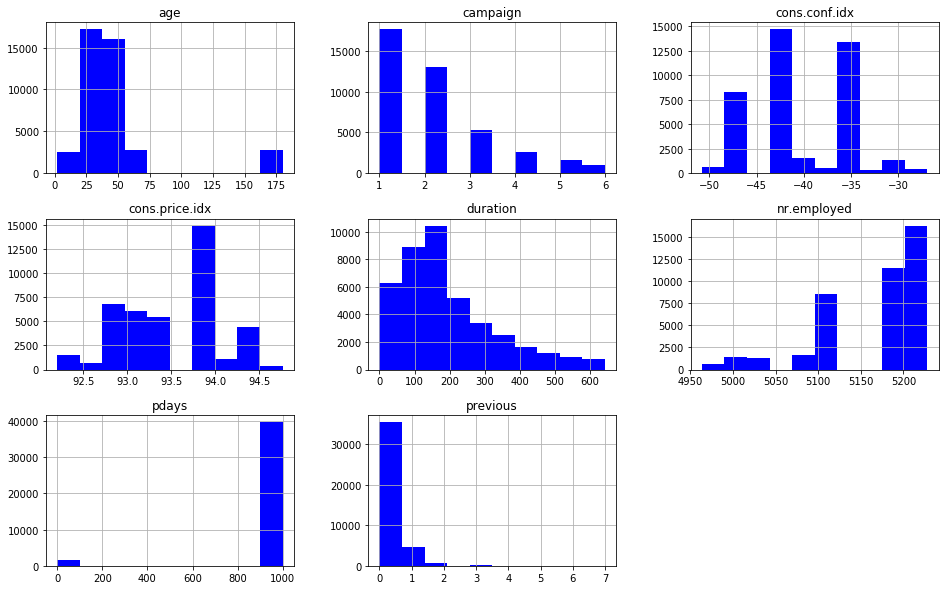

In [38]:
#Visualizing the numerical variables:

plt.rcParams["figure.figsize"] = [16,9]

bd.hist(figsize = (16,10),color="blue")

# Task 3.4: Treating Categorical variables:

In [39]:
canames=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]

In [40]:
#creating seperate dataframe with categorical variables:
bdcategoricals=bd.loc[:,canames]

In [41]:
#job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
bd["job"].value_counts() #We have to remove observations with levels named 180.0 & 2.0 from job variable:

admin.           9114
blue-collar      8078
technician       5889
services         3452
180.0            2819
management       2550
2.0              2406
retired          1519
entrepreneur     1270
self-employed    1222
housemaid         919
unemployed        887
student           779
unknown           284
Name: job, dtype: int64

In [42]:
bd.shape

(41188, 19)

In [43]:
# Imputing 'job' has value 180.0 to 2.0 to unknown:
#bd['job']=np.where(bd['job'] == 180.0, 'unknown', bd['job'])
#bd['job']=np.where(bd['job'] == 2.0, 'unknown', bd['job'])

# Dropping  those observations has value job as 180.0 to 2.0:
bd.drop( bd[ bd['job'] == 180.0 ].index , inplace=True)
bd.drop( bd[ bd['job'] == 2.0 ].index , inplace=True)
bd.shape

(35963, 19)

Thus we dropped the observations which had job as 180.0 & 2.0. 

In [44]:
bd["job"].value_counts()

admin.           9114
blue-collar      8078
technician       5889
services         3452
management       2550
retired          1519
entrepreneur     1270
self-employed    1222
housemaid         919
unemployed        887
student           779
unknown           284
Name: job, dtype: int64

In [45]:
#marital:  marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
bd["marital"].value_counts()

married     21780
single      10090
divorced     4031
unknown        62
Name: marital, dtype: int64

In [46]:
canames

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [47]:
#education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
bd["education"].value_counts() 

university.degree      10606
high.school             8312
basic.9y                5318
professional.course     4590
basic.4y                3635
basic.6y                1987
unknown                 1500
illiterate                15
Name: education, dtype: int64

In [48]:
#Combining basic.9y, basic.6y, basic.4y in to same level:
bd['education']=np.where(bd['education'] =='basic.9y', 'Basic', bd['education'])
bd['education']=np.where(bd['education'] =='basic.6y', 'Basic', bd['education'])
bd['education']=np.where(bd['education'] =='basic.4y', 'Basic', bd['education'])

In [49]:
bd["education"].value_counts()

Basic                  10940
university.degree      10606
high.school             8312
professional.course     4590
unknown                 1500
illiterate                15
Name: education, dtype: int64

In [50]:
#default:  has credit in default? (categorical: 'no','yes','unknown')
bd["default"].value_counts() 

no         28547
unknown     7413
yes            3
Name: default, dtype: int64

It seems default is not good variable. Because the proportion of yes is very very low here.

In [51]:
#housing: has housing loan? (categorical: 'no','yes','unknown')
bd["housing"].value_counts()

yes        18892
no         16205
unknown      866
Name: housing, dtype: int64

In [52]:
#loan: has personal loan? (categorical: 'no','yes','unknown')
bd["loan"].value_counts()

no         29656
yes         5441
unknown      866
Name: loan, dtype: int64

In [53]:
#contact:  contact communication type (categorical: 'cellular','telephone') 
bd["contact"].value_counts()

cellular     22996
telephone    12967
Name: contact, dtype: int64

In [54]:
#month: month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
bd["month"].value_counts()

may    12190
jul     5910
aug     5396
jun     4523
nov     3742
apr     2371
oct      661
sep      507
mar      505
dec      158
Name: month, dtype: int64

In [55]:
#day_of_week:day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
bd["day_of_week"].value_counts()

mon    7572
thu    7407
tue    7156
wed    7073
fri    6755
Name: day_of_week, dtype: int64

In [56]:
#poutcome:  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
bd["poutcome"].value_counts()

nonexistent    30820
failure         3908
success         1235
Name: poutcome, dtype: int64

# Task 3.5: Chi-Square test on categorical data:

In [57]:
#Chi-square test
from scipy.stats import chi2_contingency

In [58]:
for i in canames:
    print (i)
    chi2,p,dof,ex=chi2_contingency(pd.crosstab(bd["y"],bd[i]))
    print (p)

job
3.3213932142395946e-263
marital
4.012105620165322e-30
education
2.3884765936637214e-48
default
1.7769136308632449e-103
housing
0.03120568418492539
loan
0.18835379301128102
contact
6.2115660946706334e-186
month
0.0
day_of_week
7.179466712197447e-05
poutcome
0.0


Since loan variable has p value 0.188, which is greater than alpha =0.05
So, we accept null hypothesis that there is no association between loan and y
So, we delete the loan variable after examining it.

In [59]:
#loan:loan: has personal loan? (categorical: 'no','yes','unknown')
bd["loan"].value_counts()

no         29656
yes         5441
unknown      866
Name: loan, dtype: int64

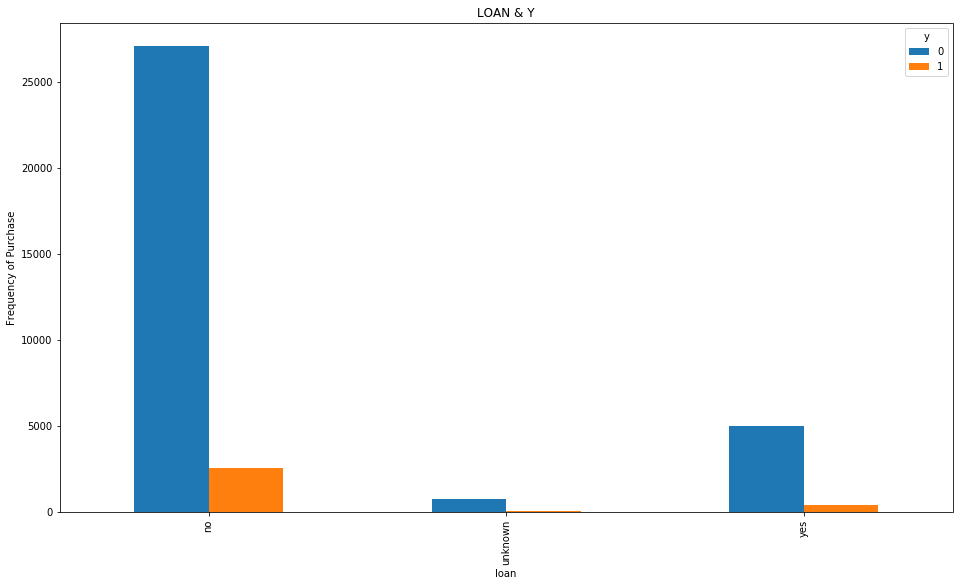

In [60]:
#Plotting loan and target:
pd.crosstab(bd.loan,bd.y).plot(kind='bar')
plt.title('LOAN & Y')
plt.xlabel('loan')
plt.ylabel('Frequency of Purchase')
plt.savefig('LOAN & Y')

In [61]:
#With the above analysis, I'm deleting the loan variable.
del bd["loan"]

In [62]:
bd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y'],
      dtype='object')

In [63]:
bd.shape

(35963, 18)

In [64]:
#Now we have 18 variables in our dataset named bd. 

In [65]:
#Making a copy of data before creating dummy variables
bd2=bd.copy()  
# We can use it for further algorithms. (IMPORTANT)

# Task 3.6: Dummy variables for categorical variables:

In [66]:
canames=["job","marital","education","default","housing","contact","month","day_of_week","poutcome"]

In [67]:
#Creating dummy variables for categorical variables: (bdd = bd dummies)
#bdd = pd.get_dummies(bd, columns = canames)

dummies1 = pd.get_dummies(bd.job,prefix='job').iloc[:,1:]
print(dummies1.head())
dummies2 = pd.get_dummies(bd.marital,prefix='marital').iloc[:,1:]
print(dummies2.head())
dummies3 = pd.get_dummies(bd.education,prefix='education').iloc[:,1:]
print(dummies3.head())
dummies4 = pd.get_dummies(bd.default,prefix='default').iloc[:,1:]
print(dummies4.head())
dummies5 = pd.get_dummies(bd.housing,prefix='housing').iloc[:,1:]
print(dummies5.head())
dummies6 = pd.get_dummies(bd.contact,prefix='contact').iloc[:,1:]
print(dummies6.head())
dummies7 = pd.get_dummies(bd.month,prefix='month').iloc[:,1:]
print(dummies7.head())
dummies8 = pd.get_dummies(bd.day_of_week,prefix='weekday').iloc[:,1:]
print(dummies8.head())
dummies9 = pd.get_dummies(bd.poutcome,prefix='poutcome').iloc[:,1:]
print(dummies9.head())

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              1               0   
1                0                 0              0               0   
2                0                 0              0               0   
3                0                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             1            0               0   
2            0                  0             1            0               0   
3            0                  0             0            0               0   
4            0                  0             1            0               0   

   job_unemployed  job_unknown  
0               0            0  
1               0         

In [68]:
#now merge dummies and bd into bd3
bd3=pd.concat([bd,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9],axis=1)
bd3.head()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,...,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success
0,56.0,housemaid,married,Basic,no,no,telephone,may,mon,261.0,...,1,0,0,0,1,0,0,0,1,0
1,57.0,services,married,high.school,unknown,no,telephone,may,mon,149.0,...,1,0,0,0,1,0,0,0,1,0
2,37.0,services,married,high.school,no,yes,telephone,may,mon,226.0,...,1,0,0,0,1,0,0,0,1,0
3,40.0,admin.,married,Basic,no,no,telephone,may,mon,151.0,...,1,0,0,0,1,0,0,0,1,0
4,56.0,services,married,high.school,no,no,telephone,may,mon,307.0,...,1,0,0,0,1,0,0,0,1,0


In [69]:
bd3= bd3.drop(["job","marital","education","default","housing","contact","month","day_of_week","poutcome"],axis=1)
bd3.head(2)

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success
0,56.0,261.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57.0,149.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [70]:
bd_final=bd3
bd_final.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success
0,56.0,261.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57.0,149.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37.0,226.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40.0,151.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56.0,307.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [71]:
#Summary of final dataset:
bd_final.describe(include="all")

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success
count,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.0,35963.000000,...,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32891.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.580485,207.100298,2.040236,961.529850,0.180825,93.560868,-40.474774,5165.086400,NaN,0.224620,...,0.338959,0.104051,0.018380,0.014098,0.210550,0.205962,0.198982,0.196674,0.856992,0.034341
std,9.622081,140.025161,1.282243,189.225895,0.504501,0.581701,4.685424,72.715016,NaN,0.417337,...,0.473363,0.305331,0.134323,0.117896,0.407705,0.404408,0.399240,0.397490,0.350086,0.182106
min,17.000000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,4963.600000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,5099.100000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,171.000000,2.000000,999.000000,0.000000,93.444000,-41.800000,5191.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,281.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,5228.100000,NaN,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [72]:
bd_final.dtypes

age                              float64
duration                         float64
campaign                         float64
pdays                              int64
previous                           int64
cons.price.idx                   float64
cons.conf.idx                    float64
nr.employed                      float64
y                                 object
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_high.school              uint8
education_illite

In [73]:
bd_final.shape 

(35963, 48)

In [74]:
cols = list(bd_final.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('y')) #Remove y from list
bd_final= bd_final[cols+['y']]

In [75]:
bd_final.head() #Thus y variable ahs gone to last. So, its easy to import to model.

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y
0,56.0,261.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57.0,149.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37.0,226.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40.0,151.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56.0,307.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0


Thus, prepared the data.

# Task 4: Model Building:

# Task 4.1: Split into train & test:

In [76]:
#split into train and test
sampleindex= np.random.rand(len(bd_final))<0.8
train=bd_final[sampleindex]
test=bd_final[~sampleindex]

In [77]:
train.shape

(28910, 48)

In [78]:
test.shape

(7053, 48)

In [79]:
train.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y
0,56.0,261.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57.0,149.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37.0,226.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40.0,151.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,45.0,198.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [80]:
test.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y
4,56.0,307.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,41.0,217.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,0,0,1,0,0,0,1,0,0
9,25.0,50.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
18,50.0,353.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,0,0,1,0,0,0,1,0,0
26,59.0,93.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [81]:
#Checking proportion of target class:
train["y"].value_counts()

0    26459
1     2451
Name: y, dtype: int64

In [82]:
#Naming all independent variables as x and target as y in train and test
x_train = train.loc[:, train.columns != 'y']
y_train = train.loc[:, train.columns == 'y']
x_test  = test.loc[:,  test.columns  != "y"]
y_test  = test.loc[:,  test.columns  == "y"]

In [83]:
x_train.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success
0,56.0,261.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57.0,149.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37.0,226.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40.0,151.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,45.0,198.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0


# TASK 4.2: MODEL BUILDING:  LOGISTIC REGRESSION

In [84]:
#clue:

#If X is your dataframe, try using the .astype method to convert to float when running the model:

#est = sm.OLS(y, X.astype(float)).fit()

###x=x.astype(np.float64)


In [85]:
#y=bd_final["y"]
#y=y.astype(int)

In [86]:
#MODEL

In [106]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [111]:
#LOGISTIC REGRESSION MODEL
logit_model=sm.Logit(y_train.astype(float),x_train.astype(float))

In [113]:
result=logit_model.fit()
result.summary()

         Current function value: 0.170182
         Iterations: 35


F:\Python files\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28910
Model:                          Logit   Df Residuals:                    28863
Method:                           MLE   Df Model:                           46
Date:                Sun, 17 Mar 2019   Pseudo R-squ.:                  0.4138
Time:                        23:41:14   Log-Likelihood:                -4919.9
converged:                      False   LL-Null:                       -8392.3
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0012      0.003     -0.386      0.699      -0.007       0.005
duration                          0.0071      0.000     39.106      0.000       0.007       0.007
campaign                         -0.0645      0.024     -2.661      0.008      -0.112      -0.017
pdays                            -0.0013      0.000     -4.695      0.000      -0.002      -0.001
previous                         -0.2092      0.072     -2.897      0.004      -0.351      -0.068
cons.price.idx                    0.6574      0.023     27.976      0.000       0.611       0.703
cons.conf.idx                     0.0637      0.006     10.313      0.000       0.052       0.076
nr.employed                      -0.0119      0.000    -28.393      0.000      -0.013      -0.011
job_blue-collar                  -0.4794      0.112     -4.276      0.000      -0.699      -0.260
job_entrepreneur                 -0.2876      0.179     -1.608      0.108      -0.638       0.063
job_housemaid                    -0.1544      0.202     -0.763      0.445      -0.551       0.242
job_management                   -0.1255      0.112     -1.125      0.261      -0.344       0.093
job_retired                       0.4267      0.118      3.616      0.000       0.195       0.658
job_self-employed                -0.1220      0.155     -0.786      0.432      -0.426       0.182
job_services                     -0.3180      0.120     -2.653      0.008      -0.553      -0.083
job_student                       0.3942      0.144      2.736      0.006       0.112       0.677
job_technician                   -0.1255      0.094     -1.340      0.180      -0.309       0.058
job_unemployed                    0.1574      0.165      0.954      0.340      -0.166       0.481
job_unknown                       0.1408      0.312      0.451      0.652      -0.471       0.753
marital_married                   0.1608      0.093      1.728      0.084      -0.022       0.343
marital_single                    0.2485      0.104      2.388      0.017       0.045       0.452
marital_unknown                   0.4460      0.506      0.881      0.379      -0.547       1.439
education_high.school            -0.0516      0.095     -0.543      0.587      -0.238       0.135
education_illiterate              2.2948      0.802      2.862      0.004       0.723       3.866
education_professional.course     0.0312      0.111      0.281      0.779      -0.187       0.249
education_university.degree       0.2083      0.094      2.223      0.026       0.025       0.392
education_unknown                 0.0899      0.142      0.634      0.526      -0.188       0.368
default_unknown                  -0.7927      0.107     -7.381      0.000      -1.003      -0.582
default_yes                     -13.0640   3333.741     -0.004      0.997   -6547.077    6520.949
housing_unknown                  -0.0315      0.185     -0.171      0.864      -0.393       0.330
housing

In [90]:
#Many variables are showing nan. I have to do feature selection and omission prior to model building. Also after model building.

In [91]:
test.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y
4,56.0,307.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,41.0,217.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,0,0,1,0,0,0,1,0,0
9,25.0,50.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
18,50.0,353.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,0,0,1,0,0,0,1,0,0
26,59.0,93.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [92]:
#prediction:
test["prediction"]=result.predict(x_test)

F:\Python files\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
test.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y,prediction
4,56.0,307.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0.015497
7,41.0,217.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,0,1,0,0,0,1,0,0,0.003754
9,25.0,50.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0.003004
18,50.0,353.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,0,1,0,0,0,1,0,0,0.019952
26,59.0,93.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0.004984


In [94]:
test.tail(15)

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y,prediction
41096,28.0,223.0,3.0,999,2,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,1,0,0,0,0.222408
41100,33.0,482.0,1.0,12,1,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,0,0,1,1,0.968575
41105,32.0,191.0,2.0,19,2,94.767,-50.8,4963.6,0,0,...,0,0,1,0,0,0,0,0,0,0.473052
41111,46.0,173.0,1.0,999,1,94.767,-50.8,4963.6,0,0,...,0,0,0,0,1,0,0,0,0,0.329442
41125,37.0,224.0,1.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,1,1,0,1,0.481883
41127,61.0,386.0,2.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,1,1,0,1,0.717534
41132,41.0,597.0,2.0,3,2,94.767,-50.8,4963.6,0,0,...,0,0,0,1,0,0,0,1,1,0.981004
41137,42.0,419.0,3.0,999,1,94.767,-50.8,4963.6,0,0,...,0,0,0,1,0,0,0,0,0,0.689491
41138,58.0,344.0,2.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,0,1,0,0,1,0,1,0.721676
41141,37.0,315.0,1.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,0,1,0,1,0.649817


In [95]:
#changing probabilities of prediction into yes or no:
test["prediction_y"]=1
test.loc[test.prediction < 0.5 ,"prediction_y"]=0

F:\Python files\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Python files\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [96]:
test.tail(10)

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y,prediction,prediction_y
41127,61.0,386.0,2.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,0,0,1,1,0,1,0.717534,1
41132,41.0,597.0,2.0,3,2,94.767,-50.8,4963.6,0,0,...,0,0,1,0,0,0,1,1,0.981004,1
41137,42.0,419.0,3.0,999,1,94.767,-50.8,4963.6,0,0,...,0,0,1,0,0,0,0,0,0.689491,1
41138,58.0,344.0,2.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,1,0,0,1,0,1,0.721676,1
41141,37.0,315.0,1.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,1,0,1,0.649817,1
41144,35.0,92.0,3.0,999,4,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,0,0,0,0.092695,0
41154,41.0,185.0,2.0,999,0,94.767,-50.8,4963.6,0,0,...,0,1,0,0,0,1,0,0,0.309572,0
41159,35.0,514.0,1.0,9,4,94.767,-50.8,4963.6,0,0,...,0,0,0,1,0,0,1,1,0.933817,1
41172,31.0,353.0,1.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,1,0,0,1,0,1,0.739599,1
41180,36.0,254.0,2.0,999,0,94.767,-50.8,4963.6,0,0,...,0,0,0,0,0,1,0,0,0.522325,1


In [97]:
#evaluation:
cm=pd.crosstab(test["y"],test["prediction_y"])
cm

prediction_y,0,1
y,,
0,6294,138
1,357,264


0    6432
1     621
Name: y, dtype: int64


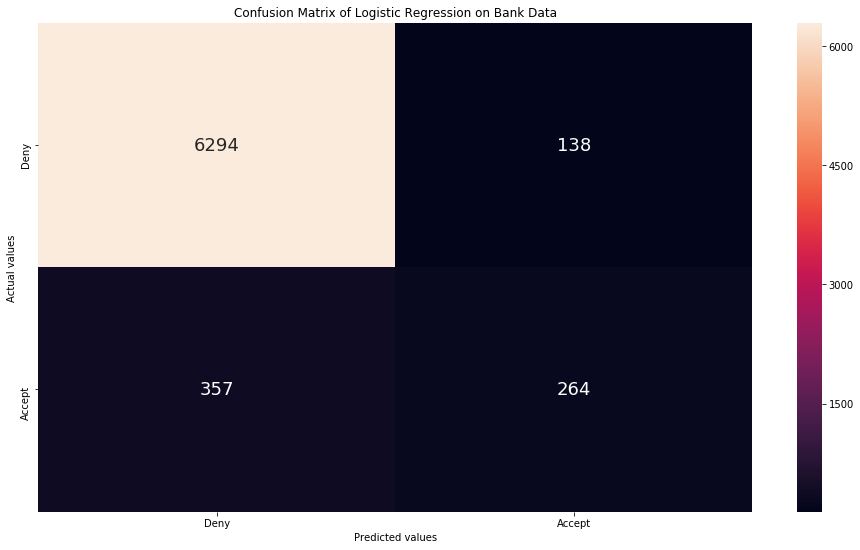

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

print(test["y"].value_counts())

ax= plt.subplot()
sns.heatmap(cm, annot=True, annot_kws={"size": 18}, fmt="d", ax = ax);
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_title('Confusion Matrix of Logistic Regression on Bank Data'); 
ax.xaxis.set_ticklabels(['Deny', 'Accept']); ax.yaxis.set_ticklabels(['Deny', 'Accept']);

In [99]:
#Giving names to values as TP, TN, FP, FN:
TN=cm.iloc[0,0]
TP=cm.iloc[1,1]
FN=cm.iloc[1,0]
FP=cm.iloc[0,1]

In [100]:
#Accuracy
((TP+TN)*100)/(TP+TN+FP+FN)

92.9817099106763

In [101]:
#False Negative Rate:
(FN*100)/(FN+TP)

57.48792270531401

Accuracy is great. But FNR is high. I think we can go with other classification models. 

In [102]:
#Recall:
(TP*100)/(TP+FN)

42.51207729468599

In [103]:
test.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_nonexistent,poutcome_success,y,prediction,prediction_y
4,56.0,307.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,1,0,0,0,1,0,0,0.015497,0
7,41.0,217.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,1,0,0,0,1,0,0,0.003754,0
9,25.0,50.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,1,0,0,0,1,0,0,0.003004,0
18,50.0,353.0,1.0,999,0,93.994,-36.4,5191.0,1,0,...,0,1,0,0,0,1,0,0,0.019952,0
26,59.0,93.0,1.0,999,0,93.994,-36.4,5191.0,0,0,...,0,1,0,0,0,1,0,0,0.004984,0


In [104]:
#######################################################################################3########################################

In [105]:
#Accuracy ~ 92 %
#FNR ~ 57%